
1. ID: ID of each client 
2. LIMIT_BAL: Amount of given credit in NT dollars
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

# Step1:Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uci-credit-cardcsv/UCI_Credit_Card.csv


In [2]:
dataset = pd.read_csv("/kaggle/input/uci-credit-cardcsv/UCI_Credit_Card.csv")
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### There are 30000 distinct credit card clients.

### The average value for the amount of credit card limit is 167,484. The standard deviation is unusually large, max value being 129,747.

### Education Level is mostly graduate school and university.

### Most of the clients are either married or single

### Average age is 35.48 years, with a standard deviation of 9.2

### As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.219 means that there are 22.12% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

In [5]:
dataset.columns
dataset.index = dataset['ID']
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
dataset.drop('ID',axis=1,inplace=True)
dataset.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
dataset['SEX'].value_counts(dropna=False)

2    18112
1    11888
Name: SEX, dtype: int64

In [8]:
dataset['EDUCATION'].value_counts(dropna=False)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [9]:
dataset = dataset.rename(columns={'default.payment.next.month': 'def_pay', 'PAY_0': 'PAY_1'})
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')


# Step2: Data Visualisation and Analysis

Text(0.5, 1.0, 'SEX v/s COUNT')

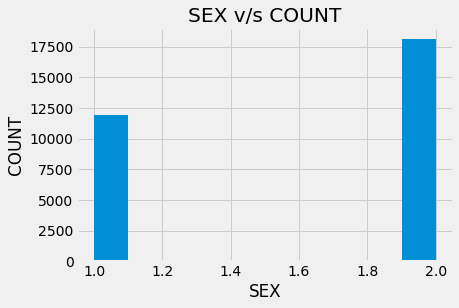

In [10]:
plt.style.use('fivethirtyeight')
dataset['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

### Number of Male credit holder is less than Female

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

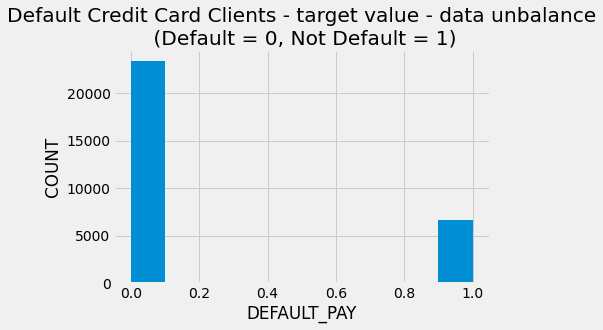

In [11]:
plt.style.use('fivethirtyeight')
dataset['def_pay'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

### Percentage of Defaulters are smaller than the Non Defaulters in the given dataset

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

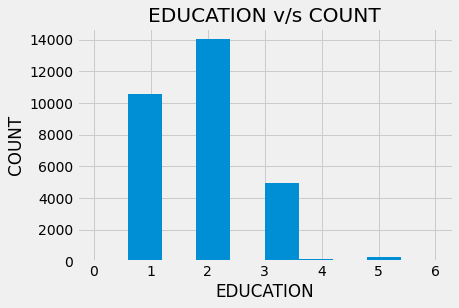

In [12]:
plt.style.use('fivethirtyeight')
dataset['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

### More number of credit holders are university students followed by Graduates and then High school students

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

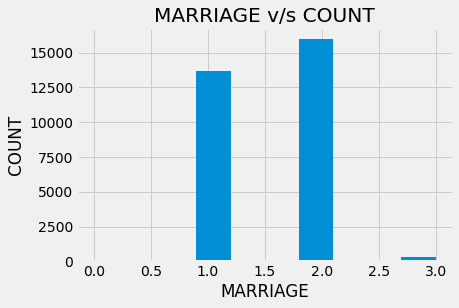

In [13]:
plt.style.use('fivethirtyeight')
dataset['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

### More number of credit cards holder are Married

<AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>

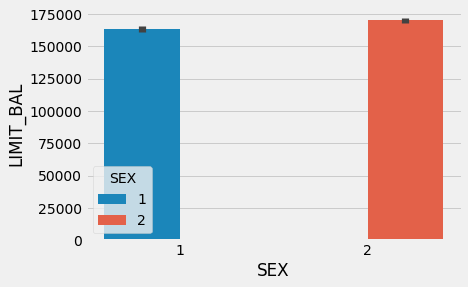

In [14]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=dataset,hue='SEX')

<AxesSubplot:xlabel='SEX', ylabel='count'>

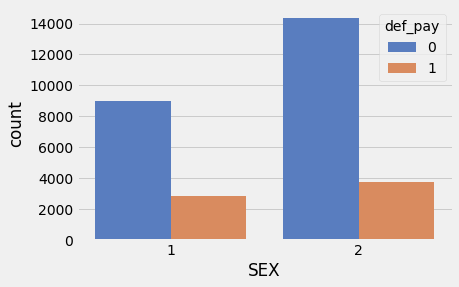

In [15]:
# Checking the number of counts of defaulters and non defaulters sexwise
sns.countplot(x='SEX', data=dataset,hue="def_pay", palette="muted")  

### It is evident from the above output that females have overall less default payments wrt males

### Non-Defaults have a higher proportion of Females (Sex=2)

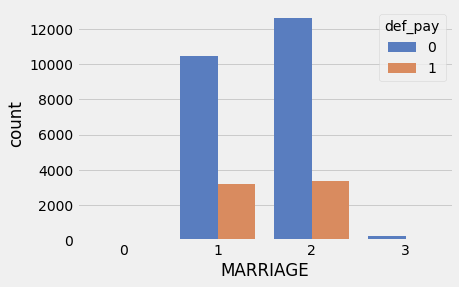

In [16]:
g=sns.countplot(x="MARRIAGE", data=dataset,hue="def_pay", palette="muted")

### From the above plot it is clear that those people who have marital status single have less default payment wrt married status people

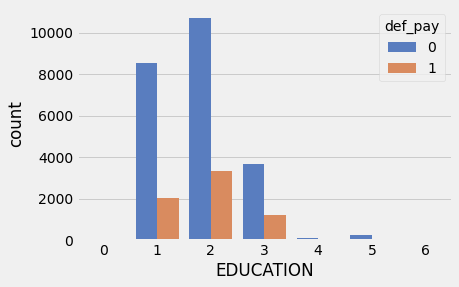

In [17]:
g=sns.countplot(x="EDUCATION", data=dataset,hue="def_pay", palette="muted")

### From the above plot it is clear that those people who are university students  have less default payment wrt graduates and high school people

# Step3: Observing  Correlation between features of the Dataset

<AxesSubplot:>

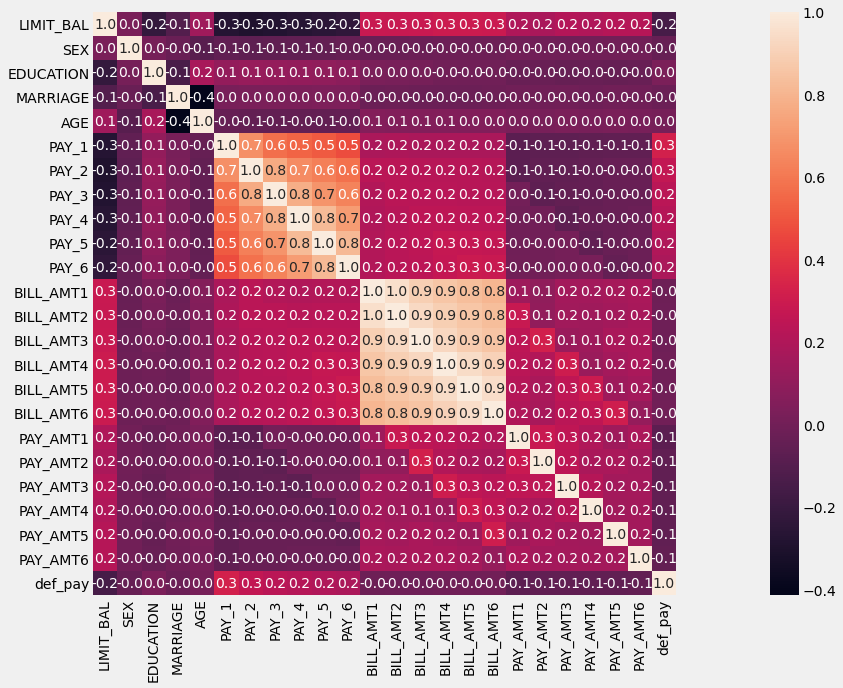

In [18]:
correlation = dataset.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )  

### So it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables

<AxesSubplot:title={'center':'Correlation with Default'}>

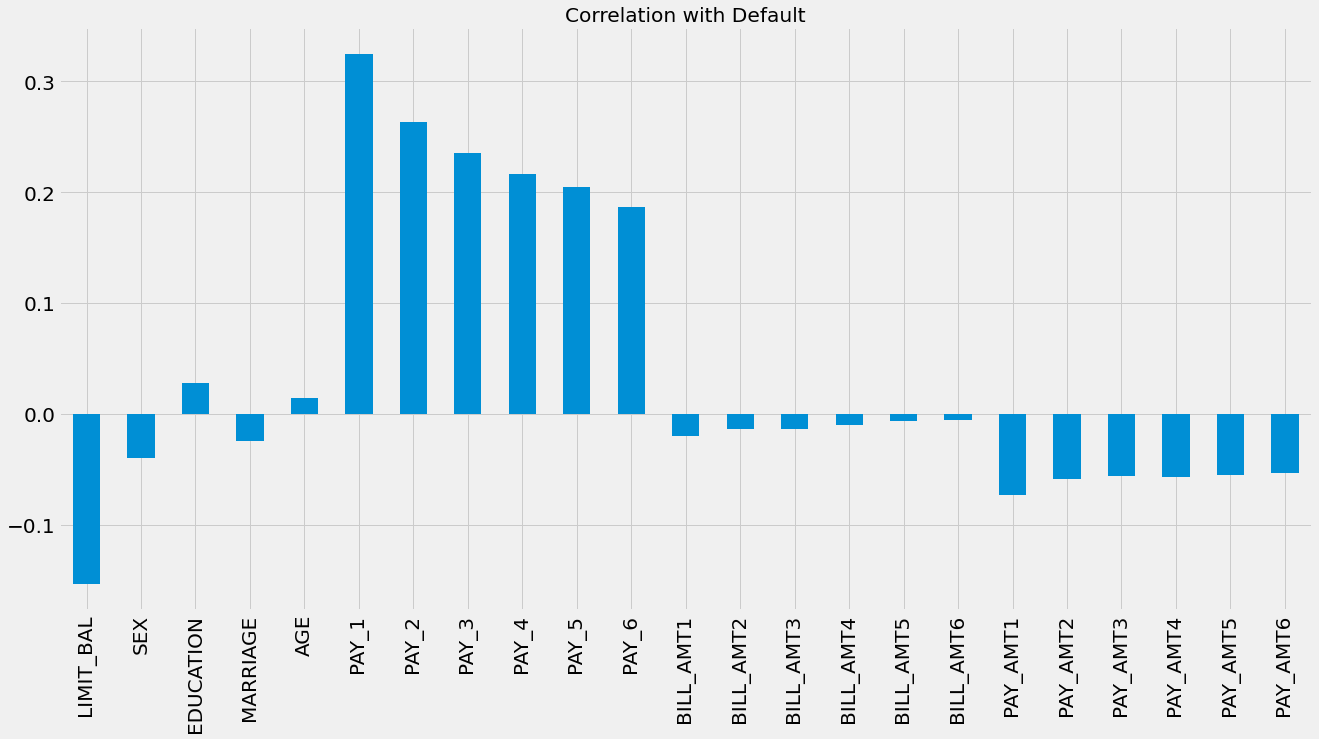

In [19]:
X = dataset.drop(['def_pay'],axis=1)
X.corrwith(dataset['def_pay']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

### It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction. ID is unimportant and it has no role in prediction so we will remove it later.



# Step4: Data Cleaning

### EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented

### MARRIAGE has a label 0 that is undocumented

### Data Transformation

### The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3)

### The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other'category (thus 4)

### Thus is a good occasion to learn how to use the .loc function

In [20]:
fil = (dataset.EDUCATION == 5) | (dataset.EDUCATION == 6) | (dataset.EDUCATION == 0)
dataset.loc[fil, 'EDUCATION'] = 4
dataset.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [21]:
dataset['EDUCATION'].value_counts(dropna = False)

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [22]:
dataset.loc[dataset.MARRIAGE == 0, 'MARRIAGE'] = 3
dataset.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [23]:
dataset.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [24]:
fil = (dataset.PAY_1 == -1) | (dataset.PAY_1==-2)
dataset.loc[fil,'PAY_1']=0
dataset.PAY_1.value_counts()
fil = (dataset.PAY_2 == -1) | (dataset.PAY_2==-2)
dataset.loc[fil,'PAY_2']=0
dataset.PAY_2.value_counts()
fil = (dataset.PAY_3 == -1) | (dataset.PAY_3==-2)
dataset.loc[fil,'PAY_3']=0
dataset.PAY_3.value_counts()
fil = (dataset.PAY_4 == -1) | (dataset.PAY_4==-2)
dataset.loc[fil,'PAY_4']=0
dataset.PAY_4.value_counts()
fil = (dataset.PAY_5 == -1) | (dataset.PAY_5==-2)
dataset.loc[fil,'PAY_5']=0
dataset.PAY_5.value_counts()
fil = (dataset.PAY_6 == -1) | (dataset.PAY_6==-2)
dataset.loc[fil,'PAY_6']=0
dataset.PAY_6.value_counts()

0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64

In [25]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

### One Hot encoding for categorical variable

In [26]:
#categorical_vars = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
#dataset[categorical_vars] = dataset[categorical_vars].astype(str)
#dataset = pd.get_dummies(dataset,columns=categorical_vars,drop_first=True)
#dataset.head()

In [27]:
dataset.shape
dataset.columns = dataset.columns.map(str.lower)
dataset.head(5)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Step5: Handling Imbalanced Data via Near Miss Algorithm

In [28]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)
print(x_smote.shape,y_smote.shape)

(46728, 23) (46728,)


# Step6: Spiliting Dataset into training and test set

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size = 0.2,random_state = 45)
X_train.shape
X_test.shape

(9346, 23)

# Step7: Applying Machine Learning Algorithm for Classification Problem

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score,roc_auc_score

In [31]:
acc = []
cv_scores = []
f1_scores=[]
prec=[]
rec=[]
roc=[]
def model(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Acc = accuracy_score(y_test, y_pred)
    print("Accuracy: {}".format(Acc))
    acc.append(Acc)
    cv_score = cross_val_score(model,X_train,y_train,cv=5)
    print("Cross Val Score: {}".format(np.mean(cv_score)))
    cv_scores.append(np.mean(cv_score))
    Prec = precision_score(y_test, y_pred)
    print("The precision is {}".format(Prec))
    prec.append(Prec)
    Rec = recall_score(y_test, y_pred)
    print("The recall is {}".format(Rec))
    rec.append(Rec)
    F1_score = f1_score(y_test, y_pred)
    print("The F1-Score is {}".format(F1_score))
    f1_scores.append(F1_score)
    Roc=roc_auc_score(y_test, y_pred)
    print("The ROC Score is {}".format(Roc))
    roc.append(Roc)

### K-Nearest Neighbour
KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.

We can implement a KNN model by following the below steps:

   * Load the data
   * Initialise the value of k
   * For getting the predicted class, iterate from 1 to total number of training data points
   * Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
   * Sort the calculated distances in ascending order based on distance values
   * Get top k rows from the sorted array
   * Get the most frequent class of these rows
   * Return the predicted class
   

Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [32]:
from sklearn.neighbors import KNeighborsClassifier         
n_neighbors=[]
for i in range(2,30):
    n_neighbors.append(i)
score = []
for a in n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=a)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))
m = score.index(max(score))
n = n_neighbors[m]
n

2

In [33]:
clf = KNeighborsClassifier(n_neighbors=n)
model(clf)

Accuracy: 0.8101861759041301
Cross Val Score: 0.7756405750955329
The precision is 0.8138989554465998
The recall is 0.8090697181606272
The F1-Score is 0.8114771519659937
The ROC Score is 0.810197275332745


### Support Vector Machine
SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems.The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.


In [34]:
from sklearn.svm import SVC
clf = SVC()
model(clf)

Accuracy: 0.6196233682858977
Cross Val Score: 0.6204326190114818
The precision is 0.6103945371775418
The recall is 0.681924136469591
The F1-Score is 0.6441797617856071
The ROC Score is 0.6190039960497945


In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
model(clf)

Accuracy: 0.8787716670233255
Cross Val Score: 0.8779894834260056
The precision is 0.918143656716418
The recall is 0.8342869251960161
The F1-Score is 0.8742089485955368
The ROC Score is 0.8792139186170269


In [36]:
models = ["KNeighborsClassifier","SVM","RandomForestClassifier"]
scores = { "Model Name" : models , "Cross Validation Score" : cv_scores, "Precision" : prec , "Recall" : rec, "F1 Score": f1_scores, "ROC Score": roc}
df1 = pd.DataFrame(scores)
df1

,Model Name,Cross Validation Score,Precision,Recall,F1 Score,ROC Score
0,KNeighborsClassifier,0.775641,0.813899,0.809070,0.811477,0.810197
1,SVM,0.620433,0.610395,0.681924,0.644180,0.619004
2,RandomForestClassifier,0.877989,0.918144,0.834287,0.874209,0.879214


## Conclusion


1)Using a **K-Nearest Neighbour**  classifier, we can predict with **80.28% accuracy**, whether a customer is likely to default next month.

2)Using a **Support Vector Machine**  classifier, we can predict with **83.00% accuracy**, whether a customer is likely to default next month.

3)Using a **Random Forest  classifier**, we can predict with **82.97% accuracy**, whether a customer is likely to default next month.



The strongest predictors of default are the **PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months)**.


**Demographics**: we see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.